In [26]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import tensorflow as tf

In [28]:
# 1. 데이터 로드 및 전처리
# 신용카드 데이터셋을 불러오기

file_path = "/content/drive/MyDrive/Colab Notebooks/WISDM.csv"

# CSV 파일 읽기
df = pd.read_csv(file_path)

# 데이터프레임 확인
print(df.head())

   0  33  Jogging    4.9106E+13  -0.6946377  12.680544  0.50395286
0  1  33  Jogging  4.910610e+13    5.012288  11.264028    0.953424
1  2  33  Jogging  4.910610e+13    4.903325  10.882658   -0.081722
2  3  33  Jogging  4.910620e+13   -0.612916  18.496431    3.023717
3  4  33  Jogging  4.910630e+13   -1.184970  12.108489    7.205164
4  5  33  Jogging  4.910640e+13    1.375655  -2.492524   -6.510526


In [30]:
# =====================================================
# 2. 스케일링 + PCA
# =====================================================
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

pca = PCA(n_components=0.95, random_state=42)  # 분산 95% 유지
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

print("PCA 차원:", X_train_pca.shape[1])



PCA 차원: 26


In [31]:
# =====================================================
# 3. 경량 Autoencoder 모델 설계
# =====================================================
input_dim = X_train_pca.shape[1]
encoding_dim = int(input_dim / 2)

input_layer = Input(shape=(input_dim,))
encoded = Dense(encoding_dim, activation='relu')(input_layer)
encoded = Dense(int(encoding_dim / 2), activation='relu')(encoded)

decoded = Dense(encoding_dim, activation='relu')(encoded)
decoded = Dense(input_dim, activation='linear')(decoded)

autoencoder = Model(inputs=input_layer, outputs=decoded)
autoencoder.compile(optimizer=Adam(learning_rate=0.001), loss='mse')

autoencoder.summary()


Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)      │ (None, 26)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 13)             │           351 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 6)              │            84 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 13)             │            91 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 26)             │           364 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 890 (3.48 KB)

 Trainable params: 890 (3.48 KB)

 Non-trainable params: 0 (0.00 B)

In [32]:
# =====================================================
# 4. 모델 학습
# =====================================================
history = autoencoder.fit(
    X_train_pca, X_train_pca,
    epochs=50,                 # 빠르게 수렴
    batch_size=512,            # GPU 효율↑
    shuffle=True,
    validation_split=0.1,
    verbose=1
)



Epoch 1/50
400/400 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - loss: 1.0490 - val_loss: 0.8505
Epoch 2/50
400/400 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.8321 - val_loss: 0.7582
Epoch 3/50
400/400 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.7496 - val_loss: 0.7183
Epoch 4/50
400/400 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - loss: 0.7098 - val_loss: 0.6985
Epoch 5/50
400/400 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 0.7220 - val_loss: 0.6887
Epoch 6/50
400/400 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.7134 - val_loss: 0.6811
Epoch 7/50
400/400 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.6911 - val_loss: 0.6754
Epoch 8/50
400/400 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.6733 - val_loss: 0.6724
Epoch 9/50
400/400 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.6707 - val_loss: 0.6761
Epoch 10/50
400/400 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.6689 - val_loss: 0.6632
Epoch 11/50
400/400 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.6776 - val_loss: 0.6592
Epoch 12/50
400/400 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/ste

In [33]:
# =====================================================
# 5. Reconstruction Error 계산
# =====================================================
reconstructions = autoencoder.predict(X_test_pca)
mse = np.mean(np.square(X_test_pca - reconstructions), axis=1)

threshold = np.mean(mse) + 3 * np.std(mse)
print(f"✅ Threshold (mean + 3σ): {threshold:.6f}")

# 이상 탐지 결과
y_pred = (mse > threshold).astype(int)



1781/1781 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step
✅ Threshold (mean + 3σ): 5.657161


In [34]:
# =====================================================
# 6. 평가
# =====================================================
print("\n=== Classification Report ===")
print(classification_report(y_test, y_pred, target_names=["Normal", "Abnormal"]))

print("\n=== Confusion Matrix ===")
print(confusion_matrix(y_test, y_pred))




=== Classification Report ===
              precision    recall  f1-score   support

      Normal       1.00      1.00      1.00     56864
    Abnormal       0.05      0.15      0.08        98

    accuracy                           0.99     56962
   macro avg       0.52      0.57      0.54     56962
weighted avg       1.00      0.99      1.00     56962


=== Confusion Matrix ===
[[56587   277]
 [   83    15]]


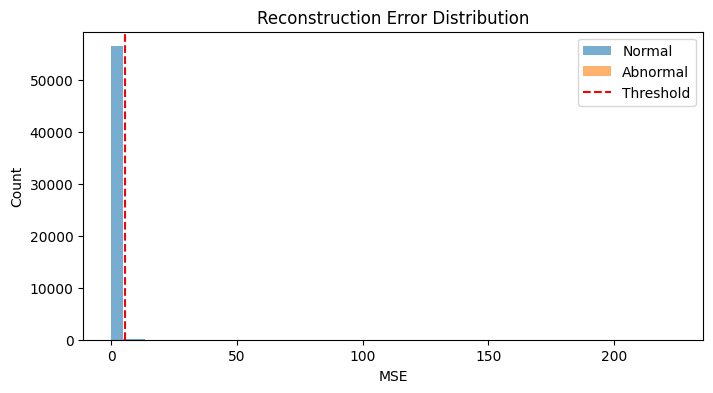

In [35]:
# =====================================================
# 7. 시각화 (오류 분포)
# =====================================================
plt.figure(figsize=(8,4))
plt.hist(mse[y_test==0], bins=50, alpha=0.6, label='Normal')
plt.hist(mse[y_test==1], bins=50, alpha=0.6, label='Abnormal')
plt.axvline(threshold, color='r', linestyle='--', label='Threshold')
plt.legend()
plt.title("Reconstruction Error Distribution")
plt.xlabel("MSE")
plt.ylabel("Count")
plt.show()